In [5]:
import pandas as pd
print("pandas version: {}". format(pd.__version__))

import mlflow
print("mlflow version: {}". format(mlflow.__version__))

import matplotlib.pyplot as plt
import seaborn as sns

pandas version: 1.4.3
mlflow version: 1.28.0


In [2]:
def add_Kaggle_score(run_id, kaggle_score):
    # show if kaggle_score is already present
    if "kaggle_score" not in dict(dict(mlflow.get_run(run_id))["data"])["metrics"].keys():
        # if no kaggle_score is present, start run and write kaggle_score
        with mlflow.start_run(run_id=run_id):
            mlflow.log_metric("kaggle_score", kaggle_score)

# Compare Runs

In [3]:
list_runs = (
    # "82a292f0aad446139c4c91a06b2b4778",
    # "76548b96d89f422fa7ffbe4121882f83",
    # "df553097911c4b7b885c03524fc77015",
    # "6ce64e8bb0c8455580d74c2ee069085d",
    # "138ba6fefb1c454a8689842f124d5608",
    # "b4f970862102465c91886e30090e5fba",
    "c0f8f58cb5b24c1383cb915ae8a542b2",
    "dfff9af24c0842d6b2fe5e289a127ccc",
    "978f77f521c84e37adca9b6da9373c47",
    "1302982dfd154d9b99baf2c62c42e27e",
    "4ca0725262bf4af9b68e81fb9e2a1ab6",
    "237467d6356e4f608fd2a5c587487686"
)

compare_scores = pd.DataFrame(columns=['algo','best_cv_score','kaggle_score'])
compare_scores = compare_scores.set_index("algo")

for run in list_runs:
    algo = dict(dict(mlflow.get_run(run))["data"])["params"]["algo"]
    best_cv_score = dict(dict(mlflow.get_run(run))["data"])["metrics"]["best_cv_score"]
    kaggle_score = dict(dict(mlflow.get_run(run))["data"])["metrics"]["kaggle_score"]

    compare_scores.loc[algo] = [best_cv_score, kaggle_score]

compare_scores

,best_cv_score,kaggle_score
algo,,
Lasso,35011.241,0.21066
Ridge,33805.547,0.16674
BayesianRidge,35339.302,0.18244
ElasticNet,35579.222,0.15933
GradientBoostingRegressor,30553.150,0.16372
RandomForestRegressor,37181.641,0.31497


<AxesSubplot:xlabel='best_cv_score', ylabel='kaggle_score'>

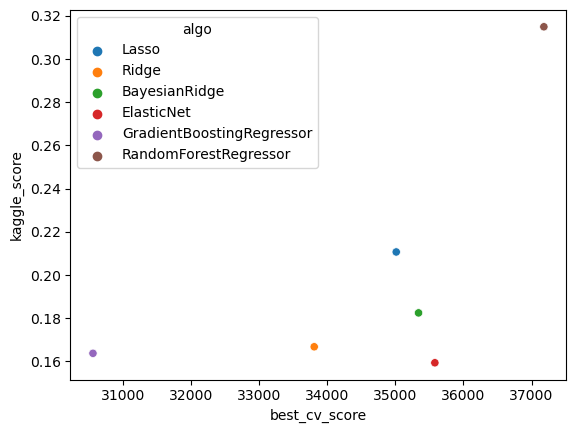

In [6]:
sns.scatterplot(data=compare_scores[compare_scores.kaggle_score != 1], x="best_cv_score", y="kaggle_score", hue=compare_scores[compare_scores.kaggle_score != 1].index)

# V0.6

# V0.5

In [ ]:
# # Version 0.5
# # First run that created inf and Null values, therefore run all algorithms in a second iteration
# add_Kaggle_score(run_id="82a292f0aad446139c4c91a06b2b4778", kaggle_score=0.2621) # Lasso
# add_Kaggle_score(run_id="76548b96d89f422fa7ffbe4121882f83", kaggle_score=0.22585) # Ridge
# add_Kaggle_score(run_id="20c743d91b884f93b7b96713ddc1043e", kaggle_score=1) # BayesianRidge -> inf
# add_Kaggle_score(run_id="138ba6fefb1c454a8689842f124d5608", kaggle_score=0.33829) # BayesianRidge
# add_Kaggle_score(run_id="df553097911c4b7b885c03524fc77015", kaggle_score=0.17173) # ElasticNet
# add_Kaggle_score(run_id="db2445f0589148e3b2bd203910c6a305", kaggle_score=1) # GradientBoostingRegressor -> Null
# add_Kaggle_score(run_id="b4f970862102465c91886e30090e5fba", kaggle_score=0.2653) # GradientBoostingRegressor
# add_Kaggle_score(run_id="6ce64e8bb0c8455580d74c2ee069085d", kaggle_score=0.23861) # RandomForestRegressor

In [ ]:
# # Version 0.5
# # Second iteration vor V0.5
# add_Kaggle_score(run_id="c0f8f58cb5b24c1383cb915ae8a542b2", kaggle_score=0.21066) # Lasso
# add_Kaggle_score(run_id="dfff9af24c0842d6b2fe5e289a127ccc", kaggle_score=0.16674) # Ridge
# add_Kaggle_score(run_id="978f77f521c84e37adca9b6da9373c47", kaggle_score=0.18244) # BayesianRidge
# add_Kaggle_score(run_id="1302982dfd154d9b99baf2c62c42e27e", kaggle_score=0.15933) # ElasticNet
# add_Kaggle_score(run_id="4ca0725262bf4af9b68e81fb9e2a1ab6", kaggle_score=0.16372) # GradientBoostingRegressor
# add_Kaggle_score(run_id="237467d6356e4f608fd2a5c587487686", kaggle_score=0.31497) # RandomForestRegressor

# Best Run (no detailed experiment available)

In [ ]:
# add_Kaggle_score(run_id="eab21fd5a7f94493925c987347293087", kaggle_score=0.13808) # Ridge
# add_Kaggle_score(run_id="6f25f31ec3e146818f7279cb16cccaa6", kaggle_score=0.13304) # Ridge -> Position 1160
# add_Kaggle_score(run_id="3e6489469e424c9fbba08a232940e2c3", kaggle_score=0.26041) # Lasso
# add_Kaggle_score(run_id="3724cc35ec0b440d89b307e39c302261", kaggle_score=0.13313) # BayesianRidge
# add_Kaggle_score(run_id="90e0b665fb8c4367ae99691fb788eabc", kaggle_score=0.16332) # ElasticNet
# add_Kaggle_score(run_id="da0a81cd09fe4ddab4924118843fab6a", kaggle_score=0) # GradientBoostingRegressor -> inf
# add_Kaggle_score(run_id="467208197c064ef292167f0ad24f4484", kaggle_score=0.16307) # GradientBoostingRegressor
# add_Kaggle_score(run_id="a4941fe4f93846fd8cd559a94291532a", kaggle_score=0.27496) # RandomForestRegressor